# 全国其他地区(除湖北省外)死亡率和治愈率分析

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataFile = '../DataVisualization/2019nCov.xlsx'
df = pd.read_excel(dataFile).T[1:]
date = pd.to_datetime(df.index.astype('str').values)
df.index = date

最简单的情况是疫情已经结束之后，死亡率和治愈率为此次疫情中所有死亡人数和治愈人数除以所有被感染人数，或者是除以死亡人数和治愈人数的总和(疫情结束时只有这两种可能的情况，$死亡率+治愈率 = 1$)
$$死亡率r = \frac{死亡总人数N_r}{被感染总人数N} = \frac{死亡总人数N_r}{死亡总人数N_r+治愈总人数N_s}$$
$$治愈率s = \frac{治愈总人数N_s}{被感染总人数N} = \frac{治愈总人数N_s}{死亡总人数N_r+治愈总人数N_s}$$


但是目前疫情还在发展中，每天都有新的确诊病例、死亡病例和治愈病例，所以上面的简单情况不适用。对于湖北省之外的其他省份，由于医疗资源充足，被感染的患者能够得到尽快的确诊和救治，可以假设确诊人数等于被感染人数，不存在被感染后得不到确诊的情况。
疫情发展过程中，每天有新增确诊病例，有治愈出院，也有死亡病例。
考虑到目前为止的确诊人数、死亡人数和治愈人数随时间的变化情况：

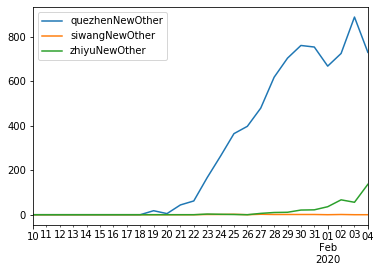

In [20]:
quezhenNewOther = df[4]
siwangNewOther = df[12]
zhiyuNewOther = df[16]
quezhenNewOther.plot(label='quezhenNewOther')
siwangNewOther.plot(label='siwangNewOther')
zhiyuNewOther.plot(label='zhiyuNewOther')
plt.legend()

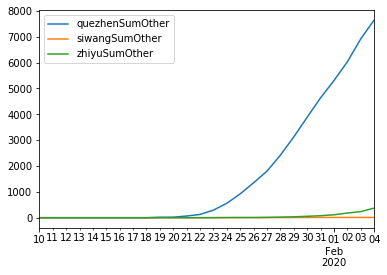

In [21]:
quezhenSumOther = df[25]
siwangSumOther = df[33]
zhiyuSumOther = df[37]
quezhenSumOther.plot(label='quezhenSumOther')
siwangSumOther.plot(label='siwangSumOther')
zhiyuSumOther.plot(label='zhiyuSumOther')
plt.legend()

首先假设死亡率不随疫情发展的阶段变化，或者说我们考虑的是疫情发展过程的平均结果，在特效药物或疫苗研制出来之前这是一个合理的假设。

最简单的情况是，确诊病例在确诊后的第$x_r$天以$r$的可能性死亡，或者在第$x_s$天以$s$的可能性被治愈。那么新增死亡人数和新增治愈人数都会与新增确诊人数呈现相同的趋势，只是分别向后延迟$x_r$天和$x_s$天，且与新增确诊人数的比例为$r$和$s$。

然而实际情况并不如此简单，否则从图中就能很容易看出这种相关性。实际情况很可能是死亡率和治愈率随确诊后时间存在某一分布，死亡和治愈人数来自于前面几天的确诊病例与分布的卷积。

把一个患者从确诊后天数设为$x$，死亡率和治愈率随天数存在特定形式的分布$f(x)$和$g(x)$，那么我们想要得到的死亡率和治愈率就等于$r=\int f(x) dx$和$s=\int g(x)dx$。

简单地处理，假设分布$f(x)$为均匀分布$f(x) = \frac{r}{b-a}$,即患者在确诊之后$a$到$b$天之间每天都有相等的可能性死亡；或者正态分布$f(x) = r * N(x; \mu, \sigma)$，即患者确诊后$\mu$天附近最有可能死亡，最终总的死亡率都为$r$。

假设每日新增确诊人数为常数100，死亡率为10%，死亡率分布为从确诊后3到7天之间的均匀分布，我们来计算一下死亡人数的分布情况。平均来说每日新增的100例确诊病例总共会有10人死亡，平均分到确诊后第3天到第7天中平均每天2人。

从第一次有确诊病例开始，前两天没有死亡病例，第3天有2人死亡，第4天有4人死亡，第5天有6人死亡，之后每天死亡人数增加2人，直至到第7天有10人死亡，之后每天死亡人数都为10人，再直到再没有新增确诊人数后的第3天死亡人数仍为10人，之后每天死亡人数减少2人，直至没有新增确诊人数后第8天再无死亡病例。
